# Landsat-8 Level1 (GeoTIFF)

Landst 8 is a unique resource for those who work in agriculture, geology, forestry, regional planning, education, mapping, and global change research. It is a multi-spectral imaging mission, capturing visible, infrared bands, and thermal bands since February 2013. This block is a L1 (TOA) data block that is AOI-clipped, which outputs a single GeoTIFF file and will store the AOI within the output feature geometry.

In [1]:
import up42

/Users/wilhelmina.nekoto/.pyenv/versions/UP42-py-dev/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
up42.authenticate(project_id="1234", 
                  project_api_key="abcd")
project = up42.initialize_project()

2021-03-15 11:51:31,084 - Authentication with UP42 successful!
2021-03-15 11:51:32,176 - Initialized Project(name: Landsat8-data-example, project_id: fbac95e6-1d78-4953-9485-b6fc072cb4c2, description: , createdAt: 2021-03-15T10:48:54.591911Z)


In [3]:
aoi = up42.get_example_aoi(as_dataframe=True)

2021-03-15 11:54:52,672 - Getting small example aoi in location 'Berlin'.


In [7]:
# Construct workflow
workflow = project.create_workflow(name="Landsat8-Geotiff-example", use_existing=True)
input_tasks = ["sentinelhub-landsat8-aoiclipped"]
workflow.add_workflow_tasks(input_tasks)

2021-03-15 12:01:53,155 - Getting existing workflows in project ...
2021-03-15 12:01:53,740 - Got 1 workflows for project fbac95e6-1d78-4953-9485-b6fc072cb4c2.
100%|██████████| 1/1 [00:00<00:00,  1.66it/s]
2021-03-15 12:01:54,344 - Using existing workflow: Landsat8-Geotiff-example - 2b4b6d62-2207-449c-a46d-658d5f960032
2021-03-15 12:01:58,264 - Added tasks to workflow: [{'name': 'sentinelhub-landsat8-aoiclipped:1', 'parentName': None, 'blockId': '95519b2d-09d7-4cd0-a321-4d6a46bef6c1'}]


In [33]:
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation='bbox', 
                                                 start_date="2018-11-07",
                                                 end_date="2020-12-31")
input_parameters["sentinelhub-landsat8-aoiclipped:1"].update({"max_cloud_cover":10})  

In [28]:
# Estimate parameters
workflow.estimate_job(input_parameters)

2021-03-15 18:32:59,371 - Estimated: 2-2 Credits, Duration: 0-0 min.


{'sentinelhub-landsat8-aoiclipped:1': {'blockConsumption': {'resources': {'unit': 'MEGAPIXEL',
    'min': 0.065536,
    'max': 0.065536},
   'credit': {'min': 1, 'max': 1}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [29]:
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-15 18:32:59,380 - +++++++++++++++++++++++++++++++++
2021-03-15 18:32:59,381 - Running this job as Test Query...
2021-03-15 18:32:59,382 - +++++++++++++++++++++++++++++++++
2021-03-15 18:32:59,383 - Selected input_parameters: {'sentinelhub-landsat8-aoiclipped:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'zoom_level': 12, 'max_cloud_cover': 100, 'intersects': {'type': 'Polygon', 'coordinates': (((13.375966, 52.515068), (13.375966, 52.516639), (13.378314, 52.516639), (13.378314, 52.515068), (13.375966, 52.515068)),)}}, 'config': {'mode': 'DRY_RUN'}}
2021-03-15 18:33:01,321 - Created and running new job: 6adde72e-4a7b-4864-94ef-3592905fa823.
2021-03-15 18:33:01,872 - Tracking job status continuously, reporting every 30 seconds...
2021-03-15 18:33:30,623 - Job finished successfully! - 6adde72e-4a7b-4864-94ef-3592905fa823


In [30]:
job = workflow.run_job(input_parameters, track_status=True)

2021-03-15 18:33:35,640 - Selected input_parameters: {'sentinelhub-landsat8-aoiclipped:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'zoom_level': 12, 'max_cloud_cover': 100, 'intersects': {'type': 'Polygon', 'coordinates': (((13.375966, 52.515068), (13.375966, 52.516639), (13.378314, 52.516639), (13.378314, 52.515068), (13.375966, 52.515068)),)}}}
2021-03-15 18:33:41,464 - Created and running new job: 81eb2ef8-f6c8-4808-99d9-5533435ee5a2.
2021-03-15 18:33:41,991 - Tracking job status continuously, reporting every 30 seconds...
2021-03-15 18:34:10,241 - Job finished successfully! - 81eb2ef8-f6c8-4808-99d9-5533435ee5a2


In [31]:
job.download_results()

2021-03-15 18:34:15,252 - Downloading results of job 81eb2ef8-f6c8-4808-99d9-5533435ee5a2
2021-03-15 18:34:15,254 - Download directory: /Users/wilhelmina.nekoto/repos/up42-py/examples/project_fbac95e6-1d78-4953-9485-b6fc072cb4c2/job_81eb2ef8-f6c8-4808-99d9-5533435ee5a2
340it [00:00, 124994.60it/s]
2021-03-15 18:34:16,616 - Download successful of 2 files to output_directory '/Users/wilhelmina.nekoto/repos/up42-py/examples/project_fbac95e6-1d78-4953-9485-b6fc072cb4c2/job_81eb2ef8-f6c8-4808-99d9-5533435ee5a2': ['data.json', '23986e78-a23d-4ce5-a815-89c5b26b112f.tif']


['/Users/wilhelmina.nekoto/repos/up42-py/examples/project_fbac95e6-1d78-4953-9485-b6fc072cb4c2/job_81eb2ef8-f6c8-4808-99d9-5533435ee5a2/data.json',
 '/Users/wilhelmina.nekoto/repos/up42-py/examples/project_fbac95e6-1d78-4953-9485-b6fc072cb4c2/job_81eb2ef8-f6c8-4808-99d9-5533435ee5a2/23986e78-a23d-4ce5-a815-89c5b26b112f.tif']

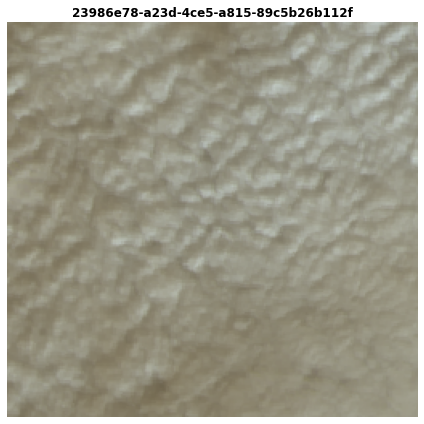

In [32]:
job.plot_results(figsize=(6,6))